In [15]:
import pandas as pd
import statsmodels as sm
from statsmodels.formula.api import logit
import numpy as np

file_path = '/home/andrei/Downloads/alzheimers_disease_data.csv'

df = pd.read_csv(file_path)


# Logistic Regression Model
# Adjust for the confounder MemoryComplaints
model = logit("Diagnosis ~ HeadInjury + MemoryComplaints", data=df)
result = model.fit()

# Display Results
print(result.summary())

# Extract Odds Ratios
odds_ratios = pd.DataFrame({
    "Variable": result.params.index,
    "Odds Ratio": result.params.apply(np.exp),  # Exponentiate coefficients
    "95% CI Lower": result.conf_int()[0].apply(np.exp),  # Exponentiate lower CI
    "95% CI Upper": result.conf_int()[1].apply(np.exp)   # Exponentiate upper CI
})
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.604298
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2146
Method:                           MLE   Df Model:                            2
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                 0.06985
Time:                        19:48:13   Log-Likelihood:                -1298.6
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 4.433e-43
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9407      0.056    -16.749      0.000      -1.051      -0.831
HeadInjury 

/tmp/ipykernel_10445/4156700493.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds Ratio', y='Variable', data=data, palette='Blues_d')


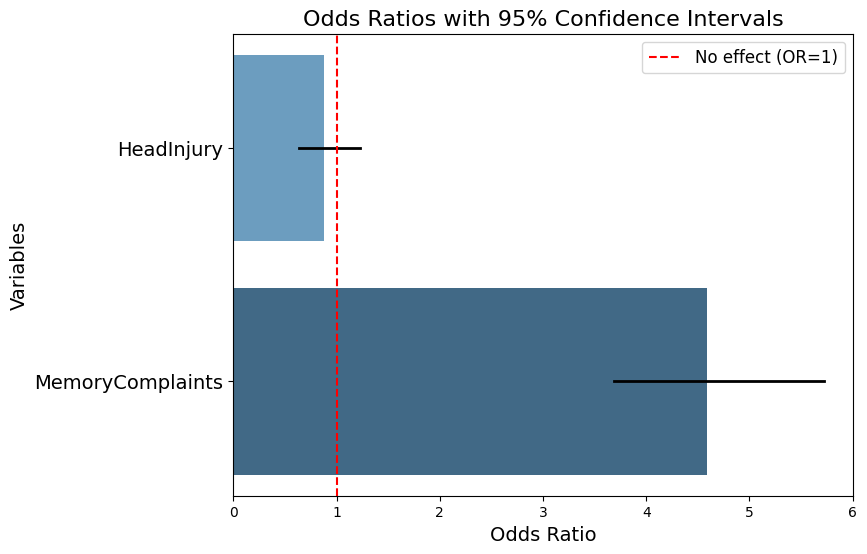

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Example data for variables and their odds ratios with confidence intervals
variables = ['HeadInjury', 'MemoryComplaints']
odds_ratios = [0.88, 4.59]
ci_lower = [0.64, 3.69]
ci_upper = [1.23, 5.72]

# Create a DataFrame
data = pd.DataFrame({
    'Variable': variables,
    'Odds Ratio': odds_ratios,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper
})

# Create plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Odds Ratio', y='Variable', data=data, palette='Blues_d')

# Add error bars for CI
for i, row in data.iterrows():
    plt.plot([row['CI Lower'], row['CI Upper']], [i, i], color='black', lw=2)

plt.axvline(1, linestyle='--', color='red', label='No effect (OR=1)')  # Add vertical line for OR = 1

# Increase font size for the title, labels, and legend
plt.title("Odds Ratios with 95% Confidence Intervals", fontsize=16)
plt.xlabel("Odds Ratio", fontsize=14)
plt.ylabel("Variables", fontsize=14)
plt.legend(fontsize=12)

# Increase font size for the y-tick labels
plt.yticks(fontsize=14)

# Save the plot with 300 dpi and larger font size
plt.savefig("odds_ratios_plot.png", dpi=300)

# Display the plot
plt.show()


## linear regression for risk difference 

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example frequency dataset
# Replace with your actual dataset


file_path = '/home/andrei/Downloads/alzheimers_disease_data.csv'

df = pd.read_csv(file_path)


# Linear Regression Model to estimate Risk Difference
# Dependent variable is Diagnosis, independent variables are HeadInjury and MemoryComplaints
model = ols("Diagnosis ~ HeadInjury + MemoryComplaints", data=df).fit()

# Display the summary of the regression
print(model.summary())

# Calculate the Risk Difference for HeadInjury
# Coefficient for HeadInjury represents the estimated Risk Difference
print("\nRisk Difference for HeadInjury:", model.params['HeadInjury'])


                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     111.7
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           6.89e-47
Time:                        19:48:21   Log-Likelihood:                -1357.0
No. Observations:                2149   AIC:                             2720.
Df Residuals:                    2146   BIC:                             2737.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2808      0.012  

/tmp/ipykernel_10445/3956739333.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=variables, y=coefficients, color='lightblue', ci=None)


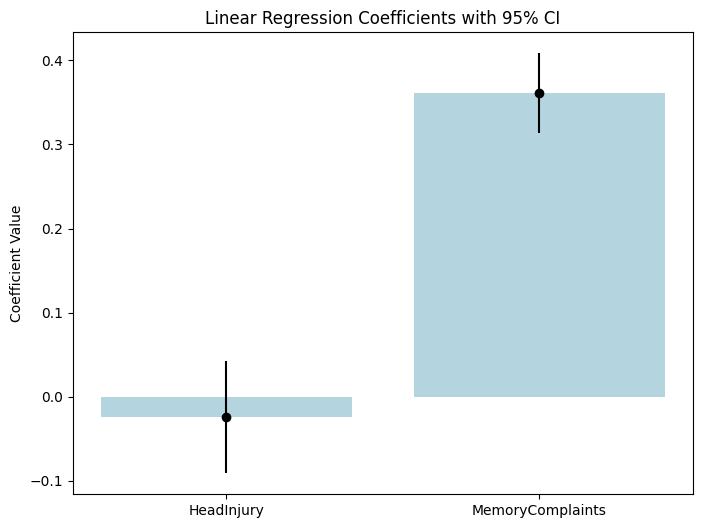

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Coefficients and their confidence intervals
variables = ['HeadInjury', 'MemoryComplaints']
coefficients = [model.params['HeadInjury'], model.params['MemoryComplaints']]
conf_int = model.conf_int().loc[['HeadInjury', 'MemoryComplaints']]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=variables, y=coefficients, color='lightblue', ci=None)

# Add confidence intervals
for i, var in enumerate(variables):
    plt.errorbar(x=i, y=coefficients[i], yerr=[[coefficients[i] - conf_int.iloc[i, 0]], [conf_int.iloc[i, 1] - coefficients[i]]], fmt='o', color='black')

plt.title('Linear Regression Coefficients with 95% CI')
plt.ylabel('Coefficient Value')
plt.show()


/tmp/ipykernel_10445/1132582973.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=data, palette='Blues_d')


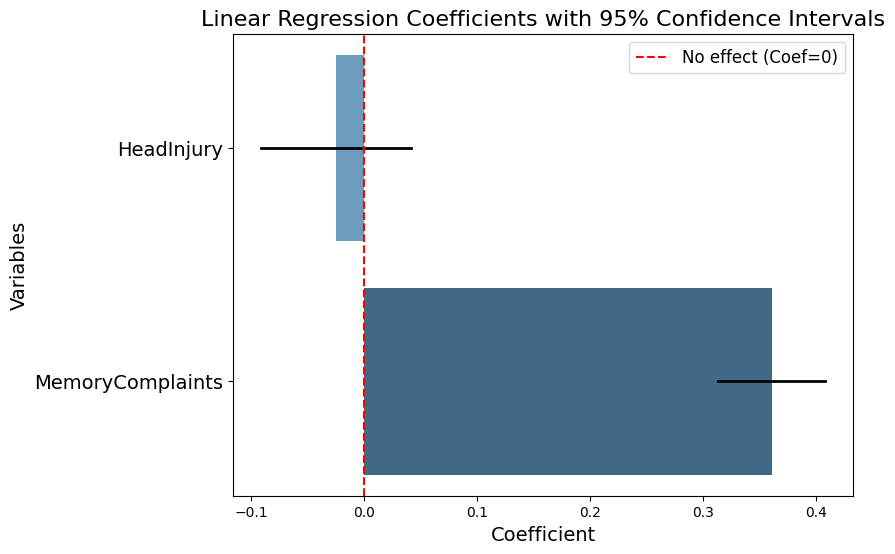

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Coefficients and their confidence intervals
variables = ['HeadInjury', 'MemoryComplaints']
coefficients = [model.params['HeadInjury'], model.params['MemoryComplaints']]
conf_int = model.conf_int().loc[['HeadInjury', 'MemoryComplaints']]

# Create a DataFrame for the coefficients and confidence intervals
data = pd.DataFrame({
    'Variable': variables,
    'Coefficient': coefficients,
    'CI Lower': [conf_int.iloc[0, 0], conf_int.iloc[1, 0]],
    'CI Upper': [conf_int.iloc[0, 1], conf_int.iloc[1, 1]]
})

# Create plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Variable', data=data, palette='Blues_d')

# Add error bars for CI
for i, row in data.iterrows():
    plt.plot([row['CI Lower'], row['CI Upper']], [i, i], color='black', lw=2)

# Add vertical line at 0 for reference (no effect)
plt.axvline(0, linestyle='--', color='red', label='No effect (Coef=0)')  # Add vertical line for Coef = 0

# Increase font size for the title, labels, and legend
plt.title("Linear Regression Coefficients with 95% Confidence Intervals", fontsize=16)
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Variables", fontsize=14)
plt.legend(fontsize=12)

# Increase font size for the y-tick labels
plt.yticks(fontsize=14)

# Save the plot with 300 dpi and larger font size
plt.savefig("linear_regression_coefficients_plot.png", dpi=300)

# Display the plot
plt.show()


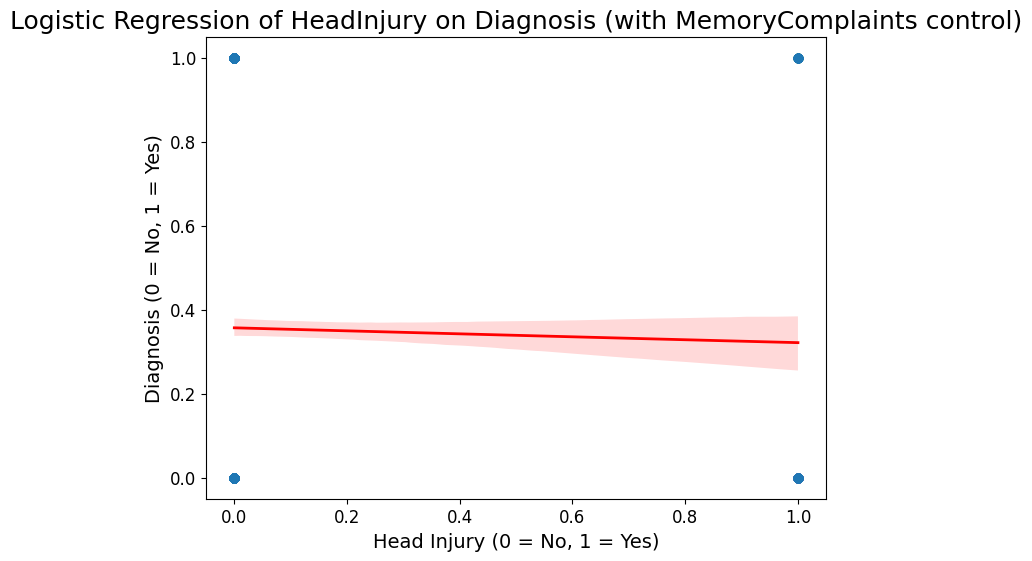

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting regression for HeadInjury against Diagnosis while controlling for MemoryComplaints
plt.figure(figsize=(8, 6))

# Create the regression plot
sns.regplot(x='HeadInjury', y='Diagnosis', data=df, logistic=True, line_kws={"color": "red", "lw": 2})

# Set the title and labels with larger fonts
plt.title('Logistic Regression of HeadInjury on Diagnosis (with MemoryComplaints control)', fontsize=18)
plt.xlabel('Head Injury (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Diagnosis (0 = No, 1 = Yes)', fontsize=14)

# Increase font size for the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot with 300 dpi
plt.savefig("regression_headinjury_diagnosis.png", dpi=300)

# Display the plot
plt.show()
